## import

In [1]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
"""

"\n%matplotlib inline\nplt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots\nplt.rcParams['image.interpolation'] = 'nearest'\nplt.rcParams['image.cmap'] = 'gray'\n"

## 1 - Datasets

In [3]:
mnist = input_data.read_data_sets("datasets/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting datasets/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting datasets/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting datasets/t10k-images-idx3-ubyte.gz
Extracting datasets/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
train_x_orig,train_y_orig,test_x_orig,test_y_orig=mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels

y= 7


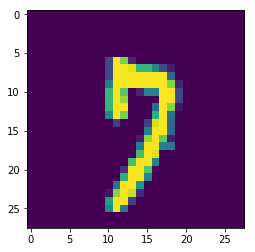

In [5]:
index = 25
plt.imshow(train_x_orig[index].reshape(28,28))
print("y= "+str(int(np.squeeze(np.dot(train_y_orig[index].reshape(1,-1),np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1))))))

In [6]:
train_x=train_x_orig.T
train_y=train_y_orig.T
test_x=test_x_orig.T
test_y=test_y_orig.T
print("The shape of train_x is ("+ str(train_x.shape[0])+', '+str(train_x.shape[1])+')')
print("The shape of train_y is ("+ str(train_y.shape[0])+', '+str(train_y.shape[1])+')')
print("The shape of test_x is ("+ str(test_x.shape[0])+', '+str(test_x.shape[1])+')')
print("The shape of test_y is ("+ str(test_y.shape[0])+', '+str(test_y.shape[1])+')')

The shape of train_x is (784, 55000)
The shape of train_y is (10, 55000)
The shape of test_x is (784, 10000)
The shape of test_y is (10, 10000)


## 2 - L-layers init paras

In [7]:
lims=[20,5,8,7,13,8]

In [11]:
def init_paras(X,Y,lims):
    np.random.seed(0)
    paras={}
    L=len(lims)
    
    paras["W0"]=np.random.randn(lims[0],X.shape[0])
    paras["b0"]=np.zeros((lims[0],1))
    for l in range(1,L):
        paras["W"+str(l)]=np.random.randn(lims[l],lims[l-1])
        paras["b"+str(l)]=np.zeros((lims[l],1))
    paras["W"+str(L)]=np.random.randn(Y.shape[0],lims[L-1])
    paras["b"+str(L)]=np.zeros((Y.shape[0],1))
    return paras

## 3 - L-layers forward propagate

In [12]:
def relu(Z):
    return np.maximum(0,Z)
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
def linear_forward(A_prev,W,b,activation):
    Z=np.dot(W,A_prev)+b
    A=activation(Z)
    cache=(A_prev,W,b,Z)
    return A,cache

In [13]:
def forward_propagate(X,paras):
    L=len(paras)//2
    caches={}
    A=X
    for l in range(L):
        A,cache=linear_forward(A,paras["W"+str(l)],paras["b"+str(l)],relu)
        caches.append(cache)
    AL,cache=linear_forward(A,paras["WL"],paras["bL"],sigmoid)
    caches.append(cache)
    return AL,caches

## 4 - Compute cost

In [16]:
def compute_cost(AL,Y):
    m=Y.shpae[1]
    cost=-np.sum(Y*np.log(AL)-(1-Y)*np.log(1-AL))/m
    
    return cost

## 5 - Backward propagate

In [ ]:
def backward_propagate():
    